# Projectile Motion Assignment: Due 9/24

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

x = 300cos(50)*t

y = 300sin(50)*t-9.8/2(t^2)

In [1]:

import numpy as np
import math
from scipy import integrate 
import matplotlib.pyplot as plt
%matplotlib notebook

Code the equations into a function 

In [2]:
#define projectile motion function in vaccum
#def proj_vac

#constants
g = -9.8
vi = 300
ang = 50 *np.pi/180
vi_x = vi*np.cos(ang)
vi_y = vi*np.sin(ang)

t0 = 0
tf = 46.9
n = 100
t = np.linspace(t0,tf,n)

x0 = [0,vi_x] #m, m/s
y0 = [0,vi_y]

def v_x(t,x):
    return np.array([x[1],0])

def v_y(t,y,g):
    return np.array([y[1],g])




Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [3]:
x_RK45 = integrate.solve_ivp(v_x,(t0,tf),x0,method='RK45',t_eval=t)
y_RK45 = integrate.solve_ivp(v_y,(t0,tf),y0,method='RK45',t_eval=t, args=[g])


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

<IPython.core.display.Javascript object>


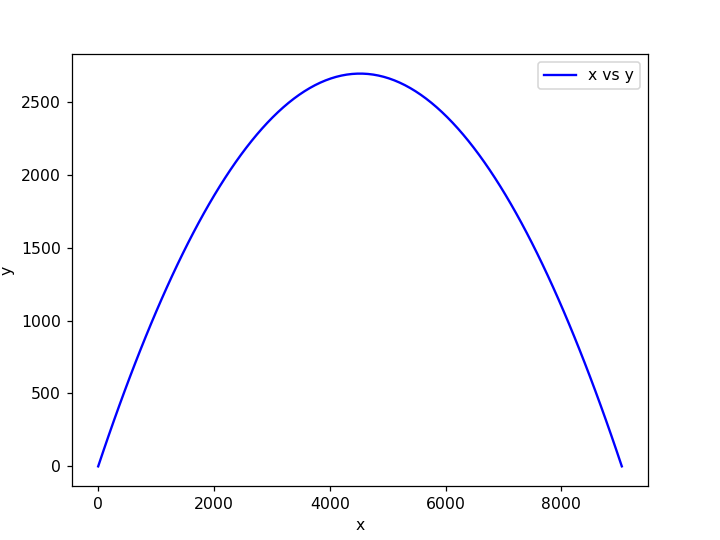

Text(0, 0.5, 'y')

In [4]:
fig = plt.figure('x vs y')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(x_RK45.y[0],y_RK45.y[0],'b', label='x vs y')
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')

#changed the time interval and found it hit 0 at around 46.9s

In [5]:
rangex = x_RK45.y[0][len(t)-1]
print("range of x is approximately", rangex,"m")

range of x is approximately 9044.021668289613 m


# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [6]:
#codes
def runge(f,t,y0,args=()):
    y = np.zeros( ( len(t), 2 ) )
    y[0] = y0  
    dt = t[1]-t[0]
    
    for i in range (0,len(t)-1):
                y[i+1]= y[i] + (dt/6.0)*(f(t[i], y[i], *args) + 2.0*f(t[i] + dt/2.0, y[i] + (dt/2.0)*f(t[i],y[i],*args),*args) + 2.0*f(t[i] + dt/2.0, y[i] + (dt/2.0)*f(t[i] + dt/2.0, y[i] + (dt/2.0)*f(t[i],y[i],*args),*args),*args) + f(t[i] + dt, y[i] + dt*f(t[i] + dt/2.0, y[i] + (dt/2.0)*f(t[i] + dt/2.0, y[i] + (dt/2.0)*f(t[i],y[i],*args),*args),*args),*args))
    return y


<IPython.core.display.Javascript object>


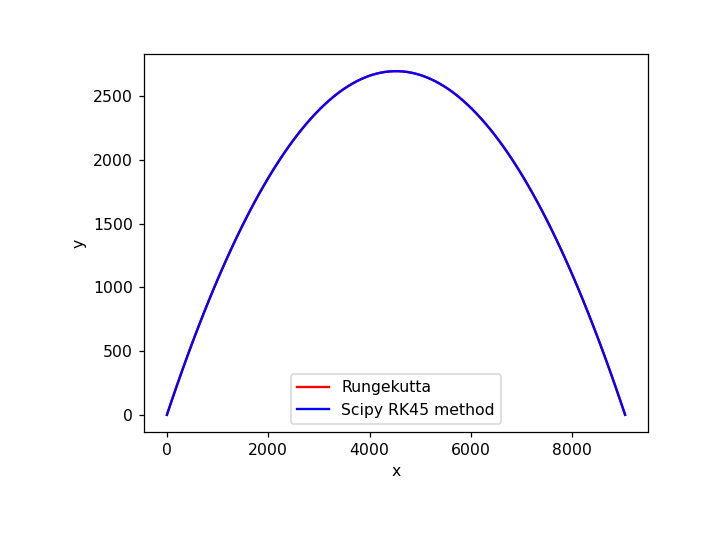

In [7]:
rk_x = runge(v_x,t,x0)
rk_y = runge(v_y,t,y0,args=[g])
fig = plt.figure("RK4 comparison")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(rk_x[ :,0], rk_y[:,0], 'r', label = r'Rungekutta')
ax.plot(x_RK45.y[0],y_RK45.y[0],'b', label='Scipy RK45 method')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?
Exactly the same

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [8]:
#constants 
D = .15
ys = .25
c = ys * D**2
lam = 10000

dens = 7.800
vol = (4/3)*np.pi*(D*100/2)**3

m = dens * vol /1000
#code
print( "value of c as a consant is,",c,"mass is,",m)
#force of air resistance

value of c as a consant is, 0.005625 mass is, 13.783737767625217


Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [9]:
#codes
def v_xd(t,x,c,m,ang,y):
    return np.array([x[1],-(c/m)*math.sqrt(x[1]**2+y[1]**2)*x[1]*np.cos(ang)])
def v_yd(t,y,g,c,m,ang,x):                                         
    return np.array([y[1],g -(c/m)*math.sqrt(x[1]**2+y[1]**2)*y[1]*np.sin(ang)])


In [10]:
xd_RK45 = integrate.solve_ivp(v_xd,(t0,tf),x0,method='RK45',t_eval=t, args = [c,m,ang,y0])
yd_RK45 = integrate.solve_ivp(v_yd,(t0,tf),y0,method='RK45',t_eval=t, args=[g,c,m,ang,x0])

Plot the ball's trajecory and find it's horizontal range

<IPython.core.display.Javascript object>


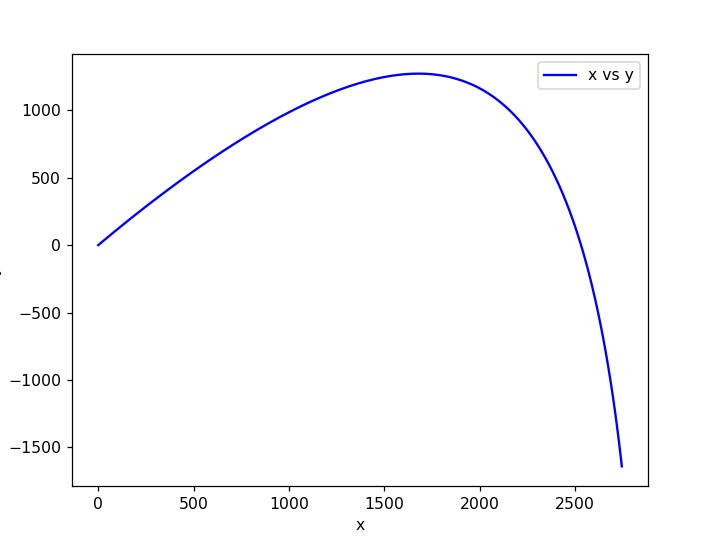

Ball travels 2744.424703882873 Meters in same time span as non dragged problem which reached 9044.021668289613


In [11]:
#codes
fig = plt.figure('x vs y with constant drag')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(xd_RK45.y[0],yd_RK45.y[0],'b', label='x vs y')
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
print("Ball travels", xd_RK45.y[0][len(t)-1], "Meters in same time span as non dragged problem which reached", x_RK45.y[0][len(t)-1])


# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [12]:
#code
#c(y) = (ys*D**2)*np.exp(-y[0]/10000)

def v_xd2(t,x,c,m,ang,ys,lam,y):
    return np.array( [x[1], -1*math.sqrt(y[1]**2+x[1]**2)*((ys*D**2)*np.exp(-1*y[0]/lam)/m)*x[1]*np.sin(ang)])
    
    
def v_yd2(t,y,g,c,m,ang,ys,lam,x):
    return np.array([y[1], g - math.sqrt(y[1]**2+x[1]**2)*((ys*D**2)*np.exp(-1*y[0]/lam)/m)*y[1]*np.cos(ang)])

lam

10000

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

In [13]:
#codes
xd2_RK45 = integrate.solve_ivp(v_xd2,(t0,tf),x0,method='RK45',t_eval=t, args = [c,m,ang,ys,lam,y0])



yd2_RK45 = integrate.solve_ivp(v_yd2,(t0,tf),y0,method='RK45',t_eval=t, args=[g,c,m,ang,ys,lam,x0])

Plot the ball's trajectory and find it's horizontal range

<IPython.core.display.Javascript object>


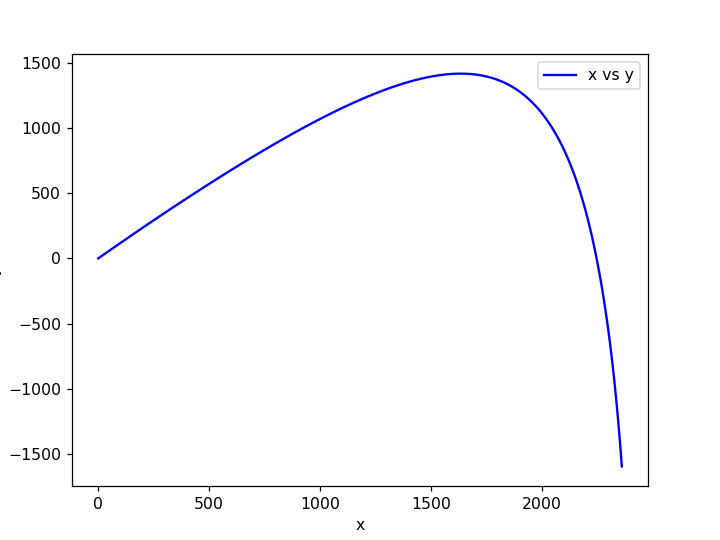

Ball travels 2360.573973306415 Meters in same time span as non dragged problem which reached 9044.021668289613


In [14]:
#codes
fig = plt.figure('x vs y with non linear drag')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(xd2_RK45.y[0],yd2_RK45.y[0],'b', label='x vs y')
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
print("Ball travels", xd2_RK45.y[0][len(t)-1], "Meters in same time span as non dragged problem which reached", x_RK45.y[0][len(t)-1])

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


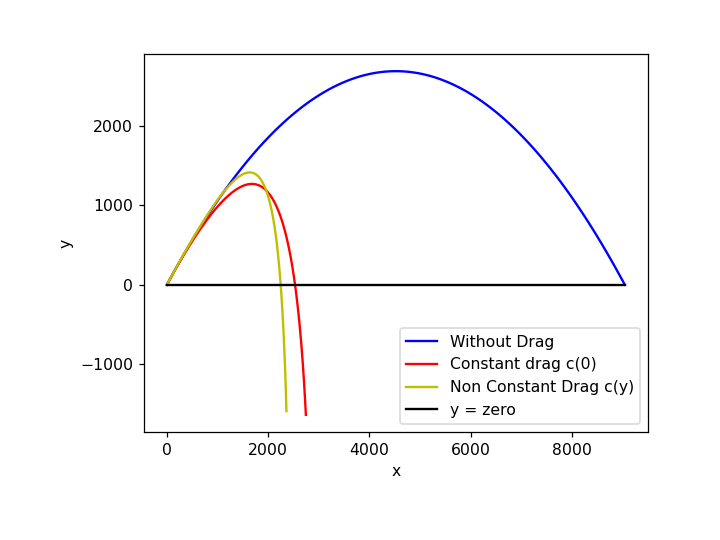

In [15]:
#codes
inp = np.array([0,9050])
zeros = np.array([0,0])

fig = plt.figure("Drag comparisons")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(x_RK45.y[0],y_RK45.y[0],'b', label='Without Drag')
ax.plot(xd_RK45.y[0],yd_RK45.y[0],'r', label='Constant drag c(0)')
ax.plot(xd2_RK45.y[0],yd2_RK45.y[0],'y', label='Non Constant Drag c(y)')
ax.plot(inp,zeros,'k',label = 'y = zero')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)

c(y) affect the range of x more than constant drag.